# Midterm Project

#### Github link: https://github.com/mohithashok/Programming_For_Datascience_Coursework

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

sns.set(style='ticks', palette='BrBG')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, append=1)

## Reading the Data
Import the data from WA_Fn-UseC_-Telco-Customer-Churn.csv file into a pandas dataframe called churn_data

In [3]:
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=[" "])

# 'na_values=[" "]' will ensure that the empty spaces are replaced with NA value

## Exploring the data

In [4]:
churn_data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [6]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
churn_data.shape

(7043, 21)

## Data Cleaning

In [8]:
# Converting 'SeniorCitizen' feature from int to a categorical feature
churn_data['SeniorCitizen']=pd.Categorical(churn_data['SeniorCitizen'])
churn_data.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [9]:
# Deleting the 'customerID' column since it does not contribute to the prediction of churn
del churn_data["customerID"]

In [10]:
# Checking for null values in the data
churn_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Dropping the records with null values since the number of records with null values (11) is considerably less compared to the total number of records (7043)
churn_data.dropna(inplace=True)

In [12]:
# Confirming the removal of null values 
churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Splitting the data into numeric and categorical

In [13]:
num = ['float64', 'int64']
num_data = churn_data.select_dtypes(include=num)
cat_data = churn_data.select_dtypes(exclude=num)

In [14]:
# Exploring the numeric part of the churn dataset 
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [15]:
# Exploring the categorical part of the churn dataset
cat_data.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


## Exploring the data using Visualizations

#### Exploring the Numeric part of the data

<function matplotlib.pyplot.plot>

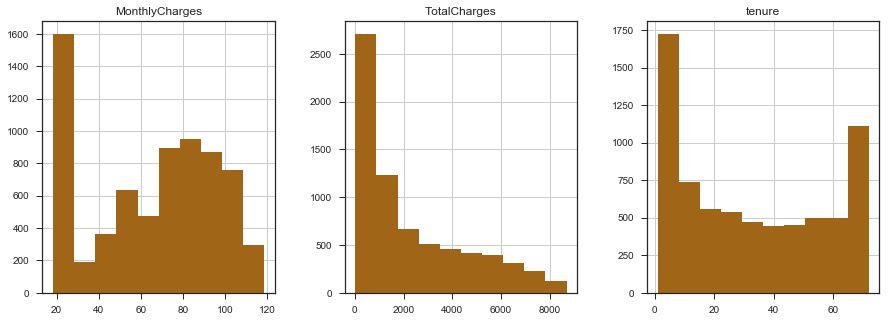

In [16]:
# Checking the distribution of the numerical features
num_data.hist(layout=(1,3), figsize=(15,5))
plt.plot

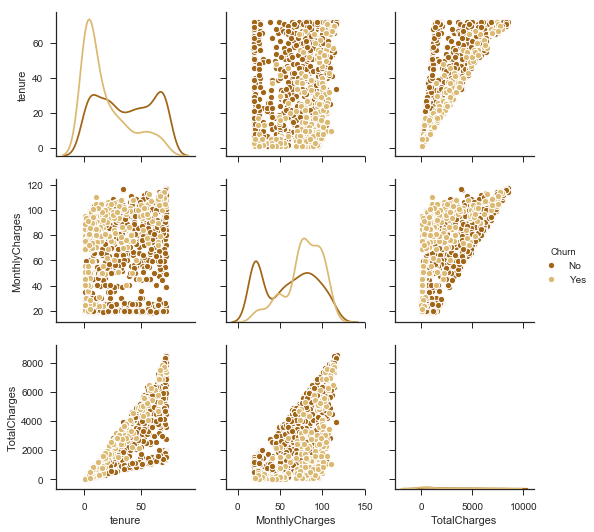

In [17]:
# Checking the relationship between the numerical variables and the target variable

num_data_new = pd.concat([num_data,churn_data["Churn"]],axis=1) 

g = sns.PairGrid(num_data_new.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

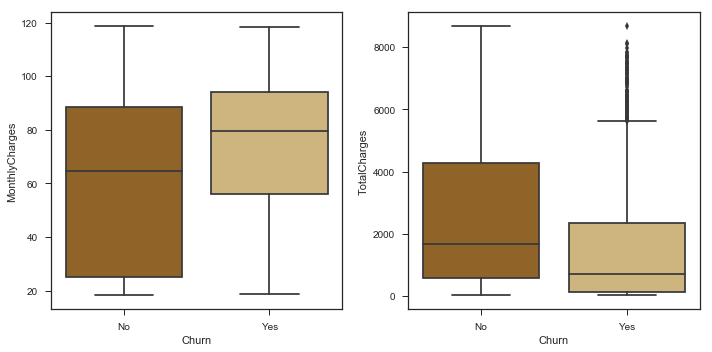

In [18]:
# Boxplot to visualize the relationship between Monthly Charges and Churn as well as Total Charges and Churn
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=num_data_new,x='Churn',y='MonthlyCharges',ax=axes[0])
sns.boxplot(data=num_data_new,x='Churn',y='TotalCharges',ax=axes[1])
plt.tight_layout()

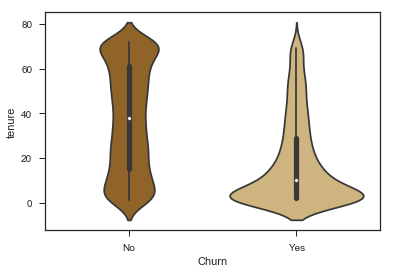

In [19]:
# Violin plot to visualize the relation between Churn and Tenure
sns.violinplot(x="Churn", y="tenure", data=num_data_new)

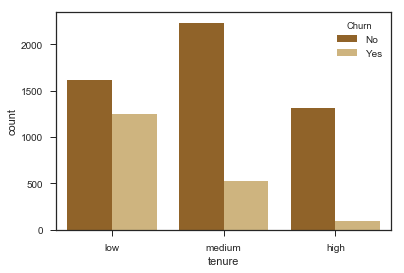

In [20]:
# Using countplot to find the distribution of churn across various bins of Tenure (Bins are decided based on the violin plot)
tenure_bins=pd.cut(num_data_new["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=num_data_new)

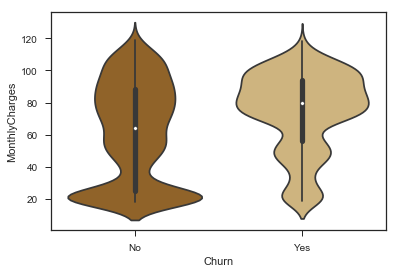

In [21]:
# Violin plot to visualize the relation between Churn and MonthlyCharges
sns.violinplot(x="Churn", y="MonthlyCharges", data=num_data_new)

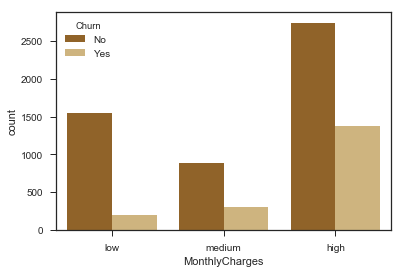

In [22]:
# Using countplot to find the distribution of churn across various bins of MonthlyCharges (Bins are decided based on the violin plot)
mc_bins=pd.cut(num_data_new["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=mc_bins, hue="Churn", data=num_data_new)

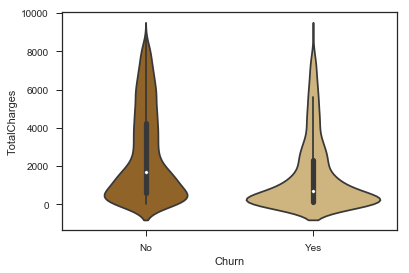

In [23]:
# Violin plot to visualize the relation between Churn and TotalCharges
sns.violinplot(x="Churn", y="TotalCharges", data=num_data_new)

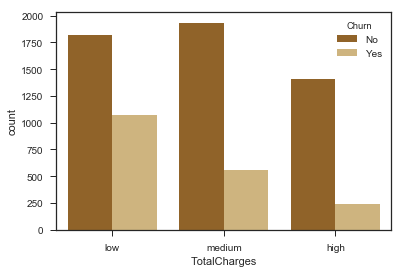

In [24]:
# Using countplot to find the distribution of churn across various bins of TotalCharges (Bins are decided based on the violin plot)
tc_bins=pd.cut(num_data_new["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=tc_bins, hue="Churn", data=num_data_new)

#### Exploring the Categorical part of the data

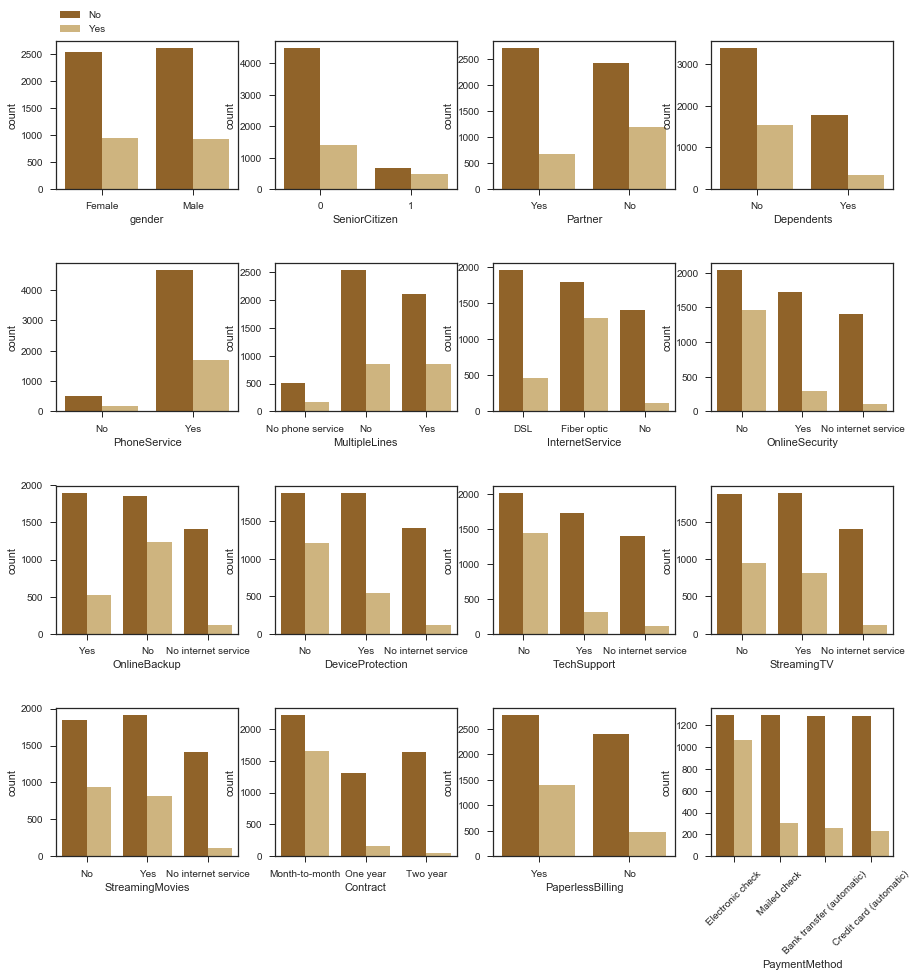

In [25]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=cat_data.iloc[:,i], hue=cat_data["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

## Converting Categorical Features

In [26]:
# Creating Dummy variables 
dummy=pd.DataFrame()
cols=[]
for col in churn_data.columns :
    if churn_data[col].dtypes =='object' :
        dummy=pd.concat([dummy,pd.get_dummies(churn_data[col],drop_first=True,prefix=col)],axis=1)
        cols.append(col)
        
churn_data=pd.concat([churn_data,dummy],axis=1)
churn_data['SeniorCitizen']=pd.to_numeric(churn_data['SeniorCitizen'])

In [27]:
churn_data=churn_data.reset_index(drop=True)
churn_data=churn_data.drop(cols,axis=1)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
SeniorCitizen                            7032 non-null int64
tenure                                   7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
PhoneService_Yes                         7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes                       7032 non-null uint8
OnlineBackup_No internet service   

## Splitting the Data into Test and Train

In [28]:
X=churn_data.drop(['Churn_Yes'],axis=1)
y=churn_data['Churn_Yes']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=101)

## Logistic Regression

#### Creating an instance of the Logistic Regression model and training it on the train set

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicting the Test set

In [30]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

#### Evaluating the model

In [31]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1580
          1       0.64      0.54      0.58       530

avg / total       0.80      0.81      0.80      2110



In [32]:
print("Train score : ",logmodel.score(X_train,y_train))
print("Test score : ", logmodel.score(X_test,y_test))

Train score :  0.8029256399837464
Test score :  0.8066350710900474


#### We can use this model to predict if a customer will churn with an accuracy of around 80%